In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages  
import glob

In [2]:
def Gaussian_2(x, mean1, amp1,amp2,std1,C): 
    return amp1*np.exp(-0.5*(x-mean1)**2/std1**2) + amp2*np.exp(-.5*(x+mean1)**2/std1**2)+ C

def SS_broad(SS, tau, plot_slices=False):
    """
    This function does...
    
    Inputs : binned SecSpec and tau
    
    ...
    
    Outputs
    
    ... 
    SS_half : [] (data we want for plotting)
    SS_half_summed : [] (data we want for plotting)
    
    
    
    """

    #select only the first (positive) half of the secondary spectrum on the tau axis
    SS_half = SS[:,-SS.shape[1]/2:]
    tau_pos = tau[-tau.shape[0]/2:]
    print('cutting tau: ',SS_half.shape,tau_pos.shape)

    SS_half_summed = np.log10(SS_half)
    
    #initialise arrays to hold parameter fits
    fwhm_array = []
    fwhm_err_array = []
    mean_array = []
    mean_err_array = []
    mean2_array = []
    mean2_err_array = []
    width_array = []
    tau_array = []
    
    for tau_idx in range(SS_half_summed.shape[1]):
        x = ft
        y = SS_half_summed[:,tau_idx]
        Cguess = np.median(y)
        Aguess = max(y) - Cguess
        offset_guess = min( abs(x[np.argmax(y)]), 5 )
        
        # Restricting width to no smaller than 1 mHz in f_D
        popt,pcov = curve_fit(Gaussian_2,x,y,p0=[offset_guess,
                                                 Aguess,Aguess,3,Cguess],
                             bounds = ([0, 0,0,1,0],[7.,np.inf,np.inf,np.inf,np.inf]))        
        # Only take slices where fit amplitude is above noise floor
        # Trying with 3*sigma to start with
        A0 = popt[1]
        A1 = popt[2]
        Amax = np.max([A0, A1])
        std = np.std(y[:len(y)//4])
        thresh = 3.0*std

        if Amax > thresh:
            mean_array.append(popt[0])
            mean_err_array.append(np.sqrt(pcov[0][0]))
            width_array.append(popt[3])
            tau_array.append(tau_pos[tau_idx])
            
        if plot_slices:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

            ax1.set_xlabel('positive fringe freq axis')
            ax1.set_ylabel('summed intensity')
            ax1.plot(ft, SS_half_summed[:,tau_idx])

            ax2.plot(x, y, 'b+:', label='data')
            fit_label = 'Fit parameters:\n%.2f, b=%.2f' % (popt[0], np.sqrt(pcov[0][0]))
            ax2.plot(x, Gaussian_2(x, *popt), 'r-', label= fit_label)
            ax2.legend()
            ax2.set_title('Gaussian Fit')
            fig.tight_layout()
    
    return np.array(mean_array), np.array(mean_err_array), np.array(mean2_array), np.array(mean2_err_array),  np.array(width_array), np.array(tau_array)
      

def parabola(x, a):
      return a*x**2 

def fitting(x, b, C):
      return b*np.sqrt(x) + C

('SS_2013-01-19.npy', 'tau_2013-01-19.npy', 'ft_2013-01-19.npy')
('SS_2013-03-29.npy', 'tau_2013-03-29.npy', 'ft_2013-03-29.npy')
('SS_2013-05-01.npy', 'tau_2013-05-01.npy', 'ft_2013-05-01.npy')
('SS_2013-05-23.npy', 'tau_2013-05-23.npy', 'ft_2013-05-23.npy')
('SS_2013-07-03.npy', 'tau_2013-07-03.npy', 'ft_2013-07-03.npy')
('SS_2013-07-27.npy', 'tau_2013-07-27.npy', 'ft_2013-07-27.npy')
('SS_2013-08-25.npy', 'tau_2013-08-25.npy', 'ft_2013-08-25.npy')
('SS_2013-09-23.npy', 'tau_2013-09-23.npy', 'ft_2013-09-23.npy')
('SS_2013-11-08.npy', 'tau_2013-11-08.npy', 'ft_2013-11-08.npy')
('SS_2014-02-16.npy', 'tau_2014-02-16.npy', 'ft_2014-02-16.npy')
('SS_2014-03-24.npy', 'tau_2014-03-24.npy', 'ft_2014-03-24.npy')
('SS_2014-05-22.npy', 'tau_2014-05-22.npy', 'ft_2014-05-22.npy')
('SS_2014-07-06.npy', 'tau_2014-07-06.npy', 'ft_2014-07-06.npy')
('SS_2014-07-27.npy', 'tau_2014-07-27.npy', 'ft_2014-07-27.npy')
('SS_2014-08-24.npy', 'tau_2014-08-24.npy', 'ft_2014-08-24.npy')
('SS_2014-09-24.npy', 'ta

/homes/gmall/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


The chisq value is 38.9916427397
Arc curvature 0.495331278221 0.0443856857095


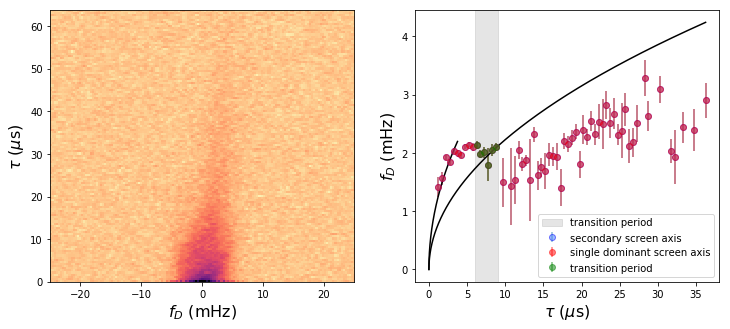

[0.49533127822119494]
[0.04438568570946022]
['2013-07-27']


In [8]:
#define data location
loc='/fpra/lofar/01/gmall/LEAP/reduce/J1643-1224/'

#find appropriate files, ignore first poor observation
dataloc=os.listdir(loc)
SSdata = sorted([loc+i for i in dataloc if 'SS' in i])[1:]
taudata = sorted([loc+i for i in dataloc if 'tau' in i])[1:]
ftdata = sorted([loc+i for i in dataloc if 'ft_' in i])[1:]

#print to check
for i in range(len(SSdata)):
    print(SSdata[i].split('/')[-1],taudata[i].split('/')[-1],ftdata[i].split('/')[-1])
print len(SSdata)

def sqt(x, a):
    return np.sqrt(a*x)

workcheck = []
barray=[]
b_errarray=[]
barray_smalltau=[]
b_errarray_smalltau=[]
mjdarray=[]
chisqs = []

#loop over all data
#for i in range(len(SSdata)):
for i in range(5,6):

    #pick data to analyse
    choice = i
    print(SSdata[choice])

    #load the dataset
    SS = np.load(SSdata[choice])
    tau = np.load(taudata[choice])
    ft = np.load(ftdata[choice])

    #average the data and tau to desired slice size in tau
    # 128 -> 1 slice per mus
    bintau = int(SS.shape[1] // 256)
    SSb = SS.reshape(-1,SS.shape[1]//bintau, bintau).mean(-1)
    SSb = np.log10(SSb)
    taub = tau.reshape(-1, bintau).mean(-1)
    
    #run ss_broad()
    mean, mean_err, mean2, mean2_err, width, tau_fit = SS_broad(SSb, taub)

    #When fitting, we only wish to fit the good values. Find these.
    #restrict to where gaussian widths are >1 and the error is less than the mean
    #cut_1 = np.argwhere((width<=5) & (mean_err<=mean)).squeeze()
    cut_1 = np.argwhere((width<=6) & (mean_err<=mean)).squeeze()
    tau_fit = tau_fit[cut_1]
    mean = mean[cut_1]
    mean_err = mean_err[cut_1]

    #restrict tau values to greater than 0 and less than 32 microseconds
    # This threshold will need to be applied differently for different datasets to
    # account for second screen
    #cut_2 = np.argwhere((tau_fit>1.) & (tau_fit<6.)).squeeze()
    cut_2 = np.argwhere((tau_fit>1.) & (tau_fit<48.)).squeeze()
    
    tau_fit2 = tau_fit[cut_2]
    mean2 = mean[cut_2]
    mean_err2 = mean_err[cut_2]
    
    #######################
    #fit the parabola to y#
    #######################
    
    try:
        #choose the x and y values and errors to fit
        x_p = mean2
        x_err_p = mean_err2
        #add half a bin to each of the tau values
        y_p = tau_fit2
        y_p = y_p + (taub[1] - taub[0])/2.

        #do the parabolic fitting
        params = curve_fit(parabola, x_p, y_p)
        [a] = params[0]
        x_fit_p = np.linspace(0, np.max(x_p), 10000)
        y_fit_p = a*x_fit_p**2


        ###################
        #fit the sqrt to x#
        ###################

        #choose the x and y values and errors to fit
        y_s = mean2
        y_err_s = mean_err2
        x_s = tau_fit2

        #do the sqrt fitting for all data points
        popt,pcov = curve_fit(sqt,x_s,y_s,sigma=y_err_s,p0=[2])
        b = popt[0]
        b_err = np.sqrt(pcov[0][0])
        barray.append(b)
        b_errarray.append(b_err)
        x_fit_s = np.linspace(0, np.max(x_s), 10000)
        y_fit_s = np.sqrt(b*x_fit_s)
        
        
        y_s_model = np.sqrt(b*x_s)

        chisq = np.sum( np.abs(y_s - y_s_model)**2 / y_err_s**2) / len(y_s)
        chisqs.append(chisq)
        print ('The chisq value is {0}'.format(chisq))
        print ('Arc curvature {0} {1}'.format(b, b_err))
        
        
        #do the sqrt fitting for tau< 5mus
        popt_smalltau,pcov_smalltau = curve_fit(sqt,tau_fit[0:6],mean[0:6],sigma=mean_err[0:6],p0=[2])
        b_smalltau = popt_smalltau[0]
        b_err_smalltau = np.sqrt(pcov_smalltau[0][0])
        barray_smalltau.append(b_smalltau)
        b_errarray_smalltau.append(b_err_smalltau)
        x_fit_s_smalltau = np.linspace(0, np.max(tau_fit[0:6]), 10000)
        y_fit_s_smalltau = np.sqrt(b_smalltau*x_fit_s_smalltau)
        
        #Splot = np.log10(SSb)
        vmin = np.median(SSb)- 0.3
        vmax = vmin+ 2.5
        
        #make the figure to save

        fig = plt.figure(figsize = (12,5))
        ax1 = fig.add_subplot(121)
        ax1.imshow(SSb[:,(SSb.shape[1]//2):].T,aspect='auto', origin='lower', vmin=vmin, vmax=vmax,
                  extent=[min(ft), max(ft), 0, max(taub)], interpolation='nearest',
                           cmap='magma_r')
        
        

        plt.xlim(-25, 25)
        plt.ylim(0, max(taub))
        
        
        
        #ax1.set_title('Secondary spectrum')
        ax1.set_xlabel(r'$f_{D}$ (mHz)', fontsize=16)
        ax1.set_ylabel(r'$\tau$ ($\mu$s)', fontsize=16)
        
        
        ax4 = fig.add_subplot(122)
        ax4.plot(x_fit_s, y_fit_s,color= 'k')
        ax4.plot(x_fit_s_smalltau, y_fit_s_smalltau,color='k')
        ax4.errorbar(tau_fit, mean, yerr= mean_err,
                     marker='.',
                     markersize=12,
                     markerfacecolor = 'xkcd:lightish blue',
                     markeredgecolor = 'blue',
                     lineStyle='none',
                     alpha=0.5,
                     label='secondary screen axis')
        
        ax4.errorbar(x_s, y_s,yerr= y_err_s,
                     marker='.',
                     color = 'red',
                     lineStyle='none',
                     alpha=0.5,
                     markersize=12,
                     label='single dominant screen axis')
        
        transition_idx=np.where((tau_fit<=9.) & (tau_fit>=6.))
        ax4.errorbar(tau_fit[transition_idx], mean[transition_idx],yerr= mean_err[transition_idx],
                     marker='.',
                     color = 'green',
                     lineStyle='none',
                     alpha=0.5,
                     markersize=12,
                     label='transition period')
        
        ax4.axvspan(6,9,color='gray',alpha=0.2,label='transition period')

        #ax4.set_xlim(0, 1.2*max(x_s))
        #ax4.set_ylim(0, 1.2*max(y_s))
        ax4.set_xlabel(r'$\tau$ ($\mu$s)', fontsize=16)
        ax4.set_ylabel(r'$f_{D}$ (mHz)', fontsize=16)
        #ax4.set_title ('Square root curve fit to data')
        
        
        split_title = SSdata[choice].split('SS_')
        plt.legend()
        #fig.suptitle('J1643-1224: {0}'.format(split_title[1][:-4]), fontsize=16)
        plt.savefig('{0}_sqrtfit.pdf'.format(split_title[1][:-4]),format='pdf')
        mjdarray.append(split_title[1][:-4])
        plt.show()
        
    except:
        print("Did not fit", i)

print(barray)
print(b_errarray)
print(mjdarray)

(1,)
[56704.]
[2.22204308]
[0.06826014]


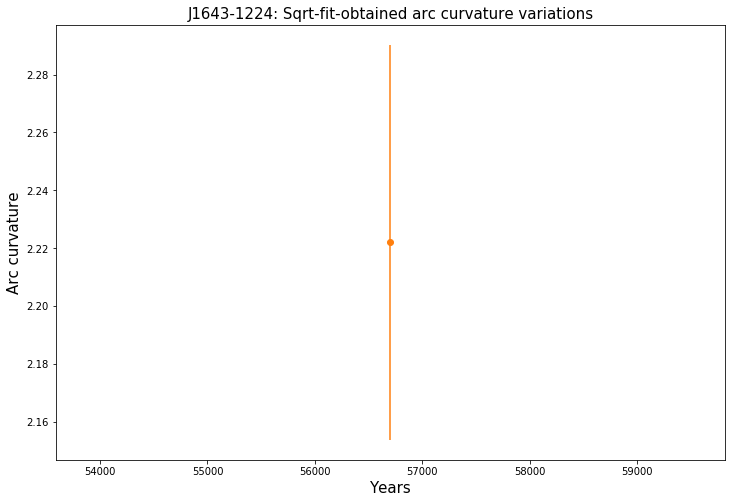

In [9]:
from astropy.time import Time

mjdar2 = []
for mjd in mjdarray:
    T = mjd+"T00:00:00"
    T = Time(T)
    mjdar2.append(T.mjd)

plt.figure(figsize=(12,8))

# Compute errors from simple error propagation
mjdar2 = np.array(mjdar2)
print mjdar2.shape
barray = np.array(barray)
#eta_sqrt = 1 / barray**2
eta_sqrt = 1 / barray
etaerr_sqrt = 1. / (barray**(2)) * b_errarray

plt.errorbar(mjdar2, eta_sqrt, yerr=etaerr_sqrt, marker='o',color='C1', linestyle='none')
plt.title('J1643-1224: Sqrt-fit-obtained arc curvature variations',fontsize= 15)
plt.xlabel('Years', fontsize= 15)
plt.ylabel('Arc curvature', fontsize= 15)

np.save('GeetamFitsTime2.npy', mjdar2)
np.save('GeetamFitsCurv2.npy', eta_sqrt)
np.save('GeetamFitsCurverr2.npy', etaerr_sqrt)
print mjdar2
print eta_sqrt
print (etaerr_sqrt)